<a href="https://colab.research.google.com/github/DeHawk/TensorFlow/blob/master/Linear_Regression_Teras_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Run this Colab on TensorFlow 2.x
%tensorflow_version 2.x

In [ ]:
# imports
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [ ]:
# build an empty model

def build_model(my_learning_rate):

  model = tf.keras.models.Sequential()

  # single node in single layer
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # compile model and set mean squared error as loss function
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics = tf.keras.metrics.RootMeanSquaredError())
  
  return model



In [ ]:
# train a model

def train_model(model, feature, label, epochs, batch_size):

  history = model.fit(x=feature,
                      y=label,
                      epochs=epochs,
                      batch_size=batch_size)
  
  # get weights and bias
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch

  # history of all epochs
  hist = pd.DataFrame(history.history)

  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

In [ ]:
# plot the models
def plot_model(trained_weight, trained_bias, feature, label):

  plt.xlabel("feature")
  plt.ylabel("label")

  plt.scatter(feature, label)

  # define points for model line
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight)*x1

  plt.plot([x0,x1],[y0,y1],c='r')

  plt.show()

# plot loss function
def plot_the_loss_curve(epochs, rmse):

  plt.figure()
  plt.xlabel("epochs")
  plt.ylabel("rmse")

  plt.plot(epochs, rmse, label = "Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()






In [ ]:
# my dataset
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/70
1/1 [==============================] - 0s 1ms/step - loss: 284.5348 - root_mean_squared_error: 16.8682
Epoch 2/70
1/1 [==============================] - 0s 1ms/step - loss: 174.7723 - root_mean_squared_error: 13.2201
Epoch 3/70
1/1 [==============================] - 0s 3ms/step - loss: 118.8230 - root_mean_squared_error: 10.9006
Epoch 4/70
1/1 [==============================] - 0s 1ms/step - loss: 83.5498 - root_mean_squared_error: 9.1406
Epoch 5/70
1/1 [==============================] - 0s 1ms/step - loss: 59.5156 - root_mean_squared_error: 7.7146
Epoch 6/70
1/1 [==============================] - 0s 2ms/step - loss: 42.5408 - root_mean_squared_error: 6.5223
Epoch 7/70
1/1 [==============================] - 0s 920us/step - loss: 30.3507 - root_mean_squared_error: 5.5091
Epoch 8/70
1/1 [==============================] - 0s 1ms/step - loss: 21.5474 - root_mean_squared_error: 4.6419
Epoch 9/70
1/1 [==============================] - 0s 883us/step - loss: 15.2001 - root_mean_squa

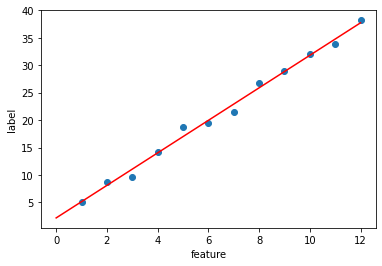

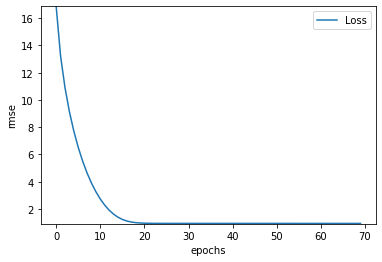

In [ ]:
# hyper parameters - learning rate, epochs, batch_size

learning_rate = 0.14
epochs = 70
my_batch_size = 12

# call build model
my_model = build_model(learning_rate)

# train model and get
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label,epochs, my_batch_size)

# plot the model
plot_model(trained_weight, trained_bias, my_feature, my_label)

# plot the loss curve
plot_the_loss_curve(epochs, rmse)




Summary of hyper parameter tuning


1. Training loss should steadily decrease, steeply at first and then slowly until the slope of curve reaches zero
2. If training loss doesnt converge, train for more epochs
3. If training loss decreases slowly, then increase learning rate
4. If training loss varies wildly, then decrease learning rate
5. Often tried option - lowering learning rate while increasing epochs and batch size
6. Very small batch size can cause instability -> start with large batch size and decrease till you see degradation
7. For very large datasets not fit into memory, use batch size to tune

*Important* The ideal combination of hyper parameter tuning is data dependent

